In [1]:
#################################################
# Name: Evelyn Tadlock                          #
# Course: CSCI 5833                             #
# Project: Course Project                       #
#################################################

In [2]:
#################################################
# Importing Required libraries                  #    
#################################################

In [3]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# Libraries for model selection, training, and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.model_selection import cross_val_score

# Libraries for performance metrics and reporting
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier


In [4]:
#################################################
# Loading and Exploring the Dataset             #    
#################################################

In [5]:
# Load the dataset
ms = pd.read_csv('ms.csv')

In [6]:
# Display the first few rows to get an overview of the data structure
ms.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [7]:
# Rename the first column to 'ID'
ms.rename(columns = {'Unnamed: 0': 'ID'}, inplace=True)

In [8]:
ms.head()

,ID,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [9]:
ms.tail()

,ID,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2
272,272,2,77,6.0,3,3,2.0,1,0,0,1,0,0,0,0,0,0,NaN,NaN,2


In [10]:
ms.shape

(273, 20)

In [11]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [12]:
ms.describe()

,ID,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
count,273.000000,273.000000,273.000000,272.000000,273.000000,273.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,125.000000,125.00000,273.000000
mean,136.000000,1.615385,34.062271,15.176471,1.831502,1.710623,6.430147,1.725275,0.358974,0.424908,0.369963,0.307692,0.065934,0.505495,0.432234,0.293040,0.315018,1.360000,1.44800,1.542125
std,78.952517,0.487398,11.114369,4.244175,0.874998,0.732991,4.222009,0.494066,0.558426,0.495237,0.483681,0.462386,0.248623,0.500888,0.496296,0.455993,0.465376,0.587504,0.65323,0.499137
min,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,68.000000,1.000000,25.000000,12.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
50%,136.000000,2.000000,33.000000,15.000000,2.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000
75%,204.000000,2.000000,40.000000,20.000000,3.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000,2.000000
max,272.000000,2.000000,77.000000,25.000000,3.000000,3.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,2.000000


In [13]:
#################################################
# Data Preprocessing                            #    
#################################################

In [14]:
ms.isnull().sum()

ID                           0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [15]:
# Only modifying the columns are missing the data
categorical_features = ['Schooling', 'Initial_Symptom']
numerical_features = ['Initial_EDSS', 'Final_EDSS']

ms[categorical_features] = ms.groupby('group')[categorical_features].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else -1)
)
ms.loc[(ms['group'] == 1) & (ms['Initial_EDSS'].isnull()), 'Initial_EDSS'] = ms[ms['group'] == 1]['Initial_EDSS'].median()
ms.loc[(ms['group'] == 2) & (ms['Initial_EDSS'].isnull()), 'Initial_EDSS'] = -1


ms.loc[(ms['group'] == 1) & (ms['Final_EDSS'].isnull()), 'Final_EDSS'] = ms[ms['group'] == 1]['Final_EDSS'].median()
ms.loc[(ms['group'] == 2) & (ms['Final_EDSS'].isnull()), 'Final_EDSS'] = -1


In [16]:
# Verify that all missing values have been handled
ms.isnull().sum()

ID                         0
Gender                     0
Age                        0
Schooling                  0
Breastfeeding              0
Varicella                  0
Initial_Symptom            0
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
Initial_EDSS               0
Final_EDSS                 0
group                      0
dtype: int64

In [17]:
#################################################
# EDA and Visualizations                        #    
#################################################

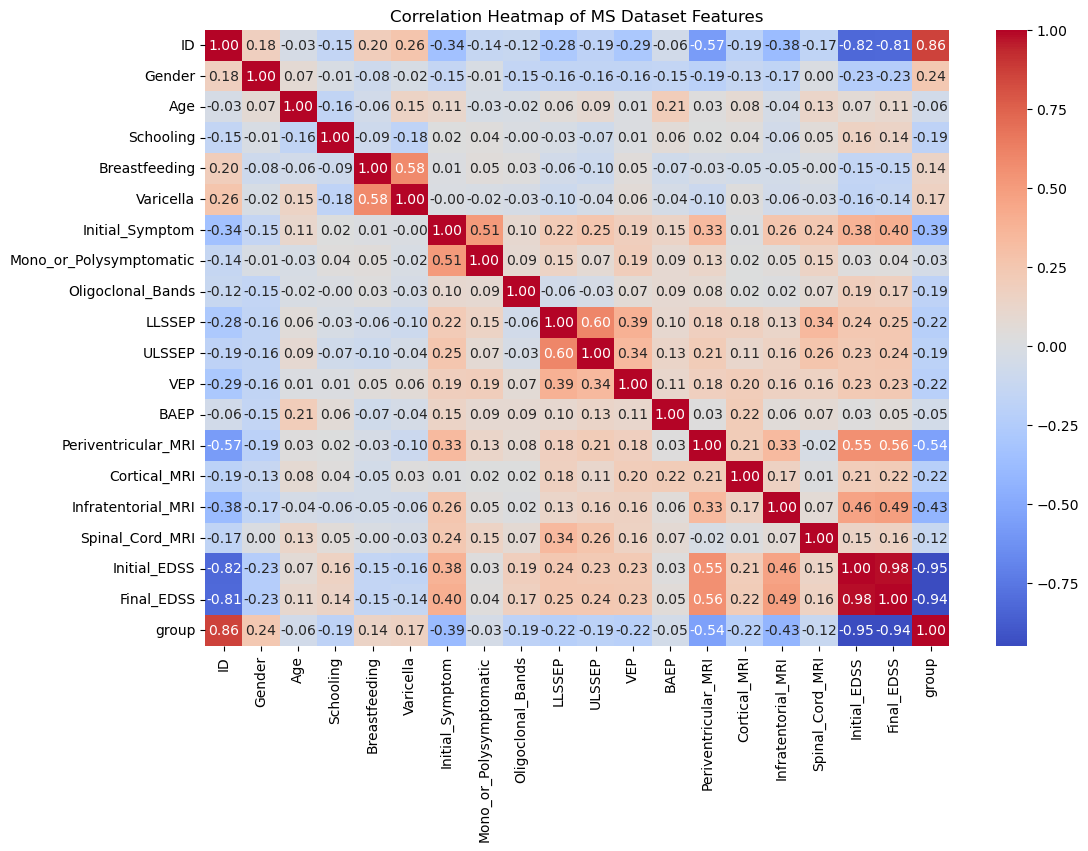

In [18]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ms.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of MS Dataset Features")
plt.show()

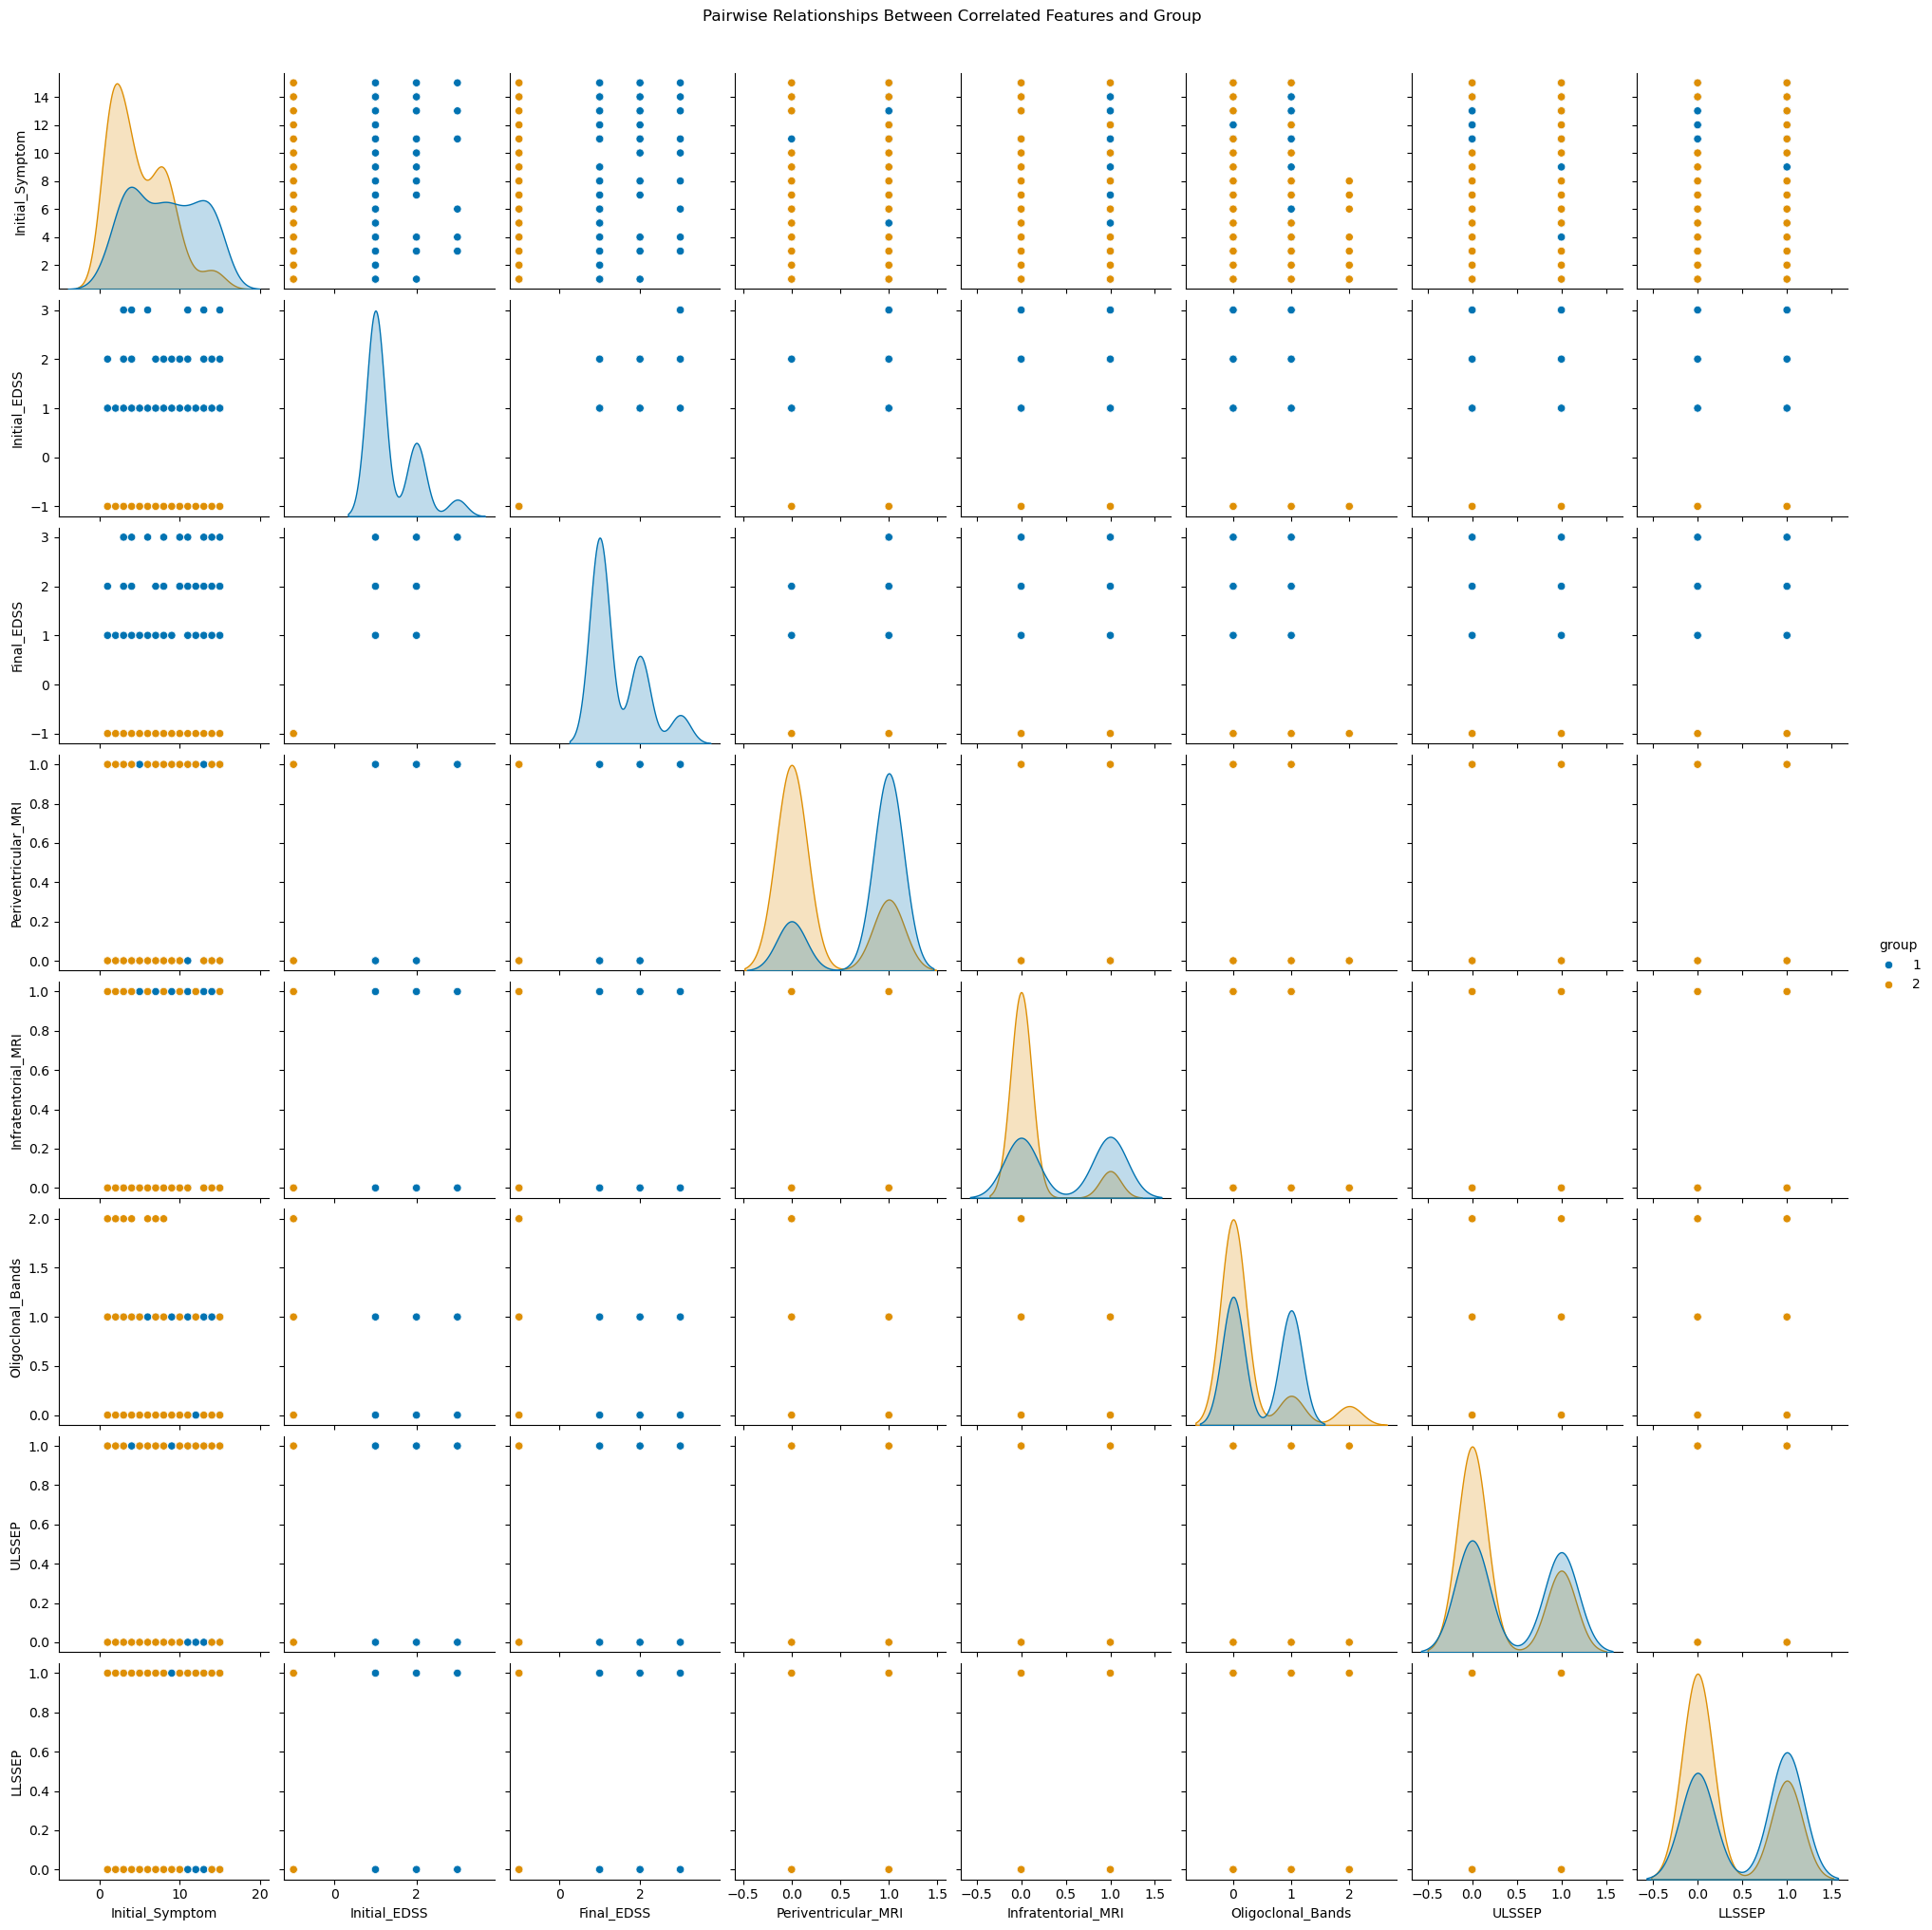

In [19]:
correlated_features = ['Initial_Symptom', 'Initial_EDSS', 'Final_EDSS', 
                           'Periventricular_MRI', 'Infratentorial_MRI', 'Oligoclonal_Bands', 'ULSSEP','LLSSEP']

# Create pairplot with updated features
sns.pairplot(ms, vars=correlated_features, hue='group', palette='colorblind', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Correlated Features and Group", y=1.02)
plt.show()

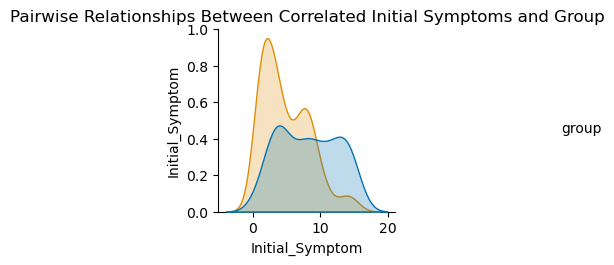

In [20]:
correlated_symptoms = ['Initial_Symptom']

# Create pairplot with updated features
sns.pairplot(ms, vars=correlated_symptoms, hue='group', palette='colorblind', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Correlated Initial Symptoms and Group", y=1.02)
plt.show()

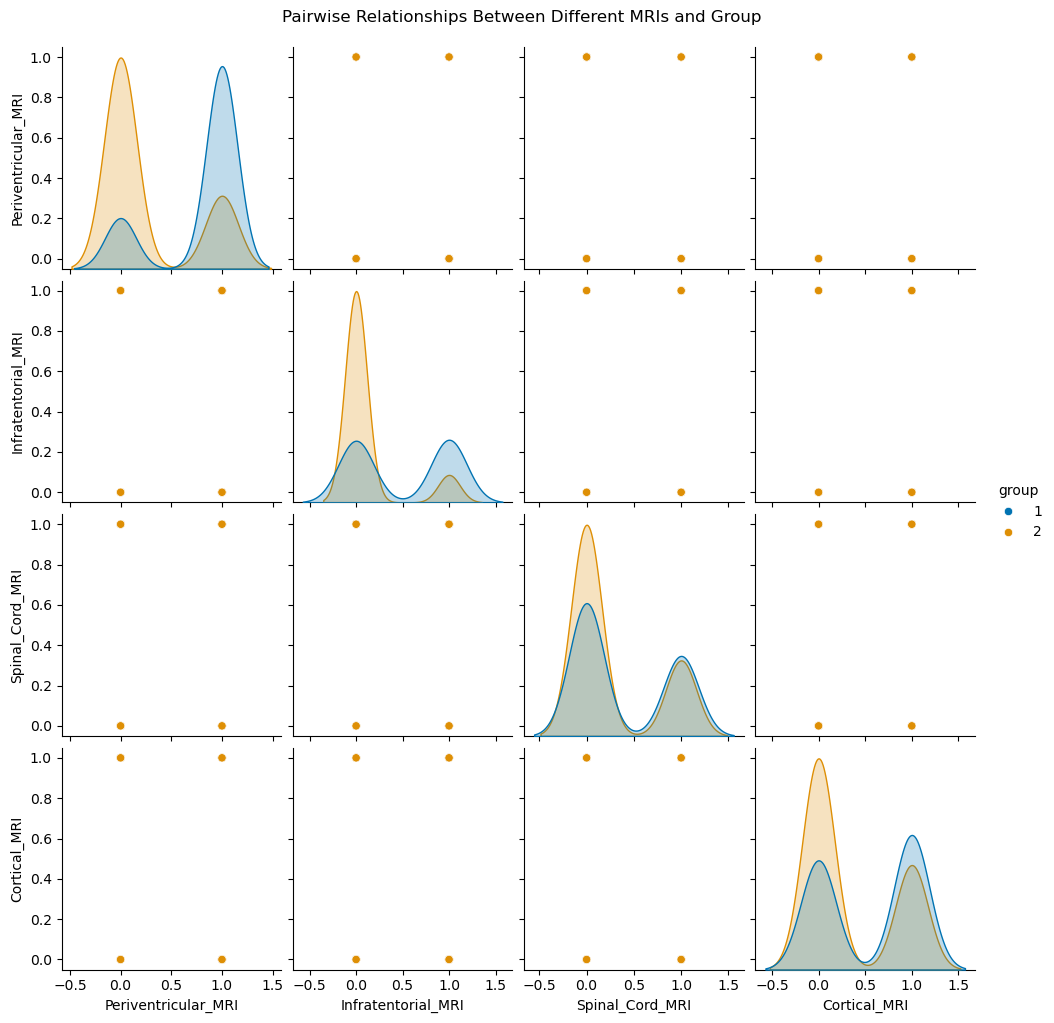

In [21]:
correlated_mris = ['Periventricular_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Cortical_MRI']

# Create pairplot with updated features
sns.pairplot(ms, vars=correlated_mris, hue='group', palette='colorblind', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Different MRIs and Group", y=1.02)
plt.show()

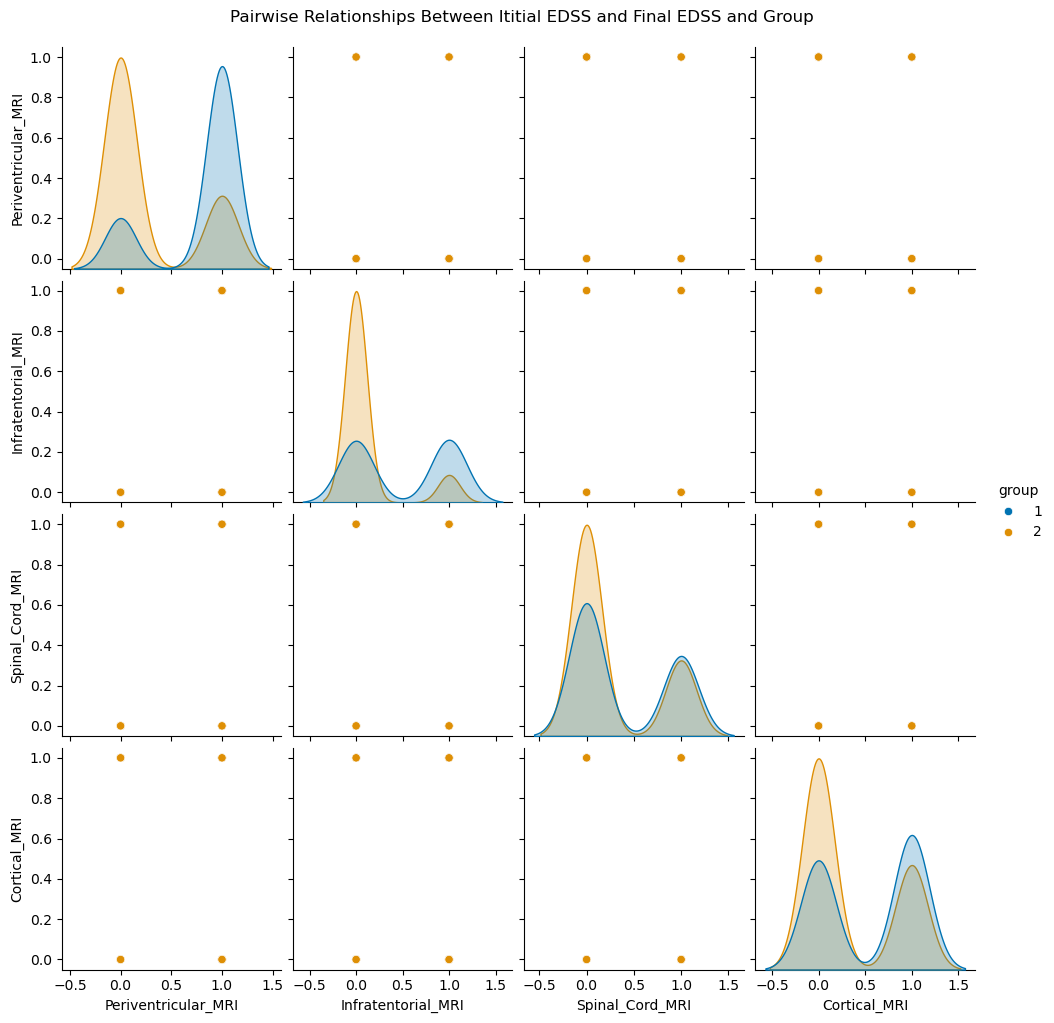

In [22]:
correlated_edss = ['Initial_EDSS', 'Final_EDSS']

# Create pairplot with updated features
sns.pairplot(ms, vars=correlated_mris, hue='group', palette='colorblind', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Ititial EDSS and Final EDSS and Group", y=1.02)
plt.show()

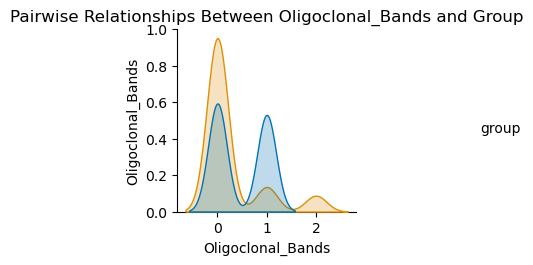

In [23]:
correlated_bands = ['Oligoclonal_Bands']

# Create pairplot with updated features
sns.pairplot(ms, vars=correlated_bands, hue='group', palette='colorblind', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Oligoclonal_Bands and Group", y=1.02)
plt.show()

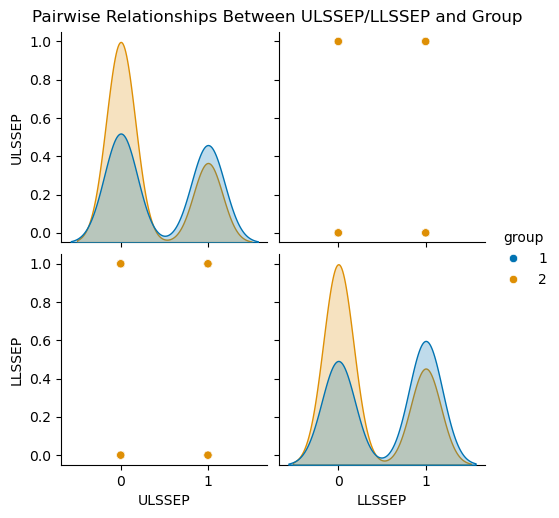

In [24]:
correlated_ssep = ['ULSSEP','LLSSEP']

# Create pairplot with updated features
sns.pairplot(ms, vars=correlated_ssep, hue='group', palette='colorblind', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between ULSSEP/LLSSEP and Group", y=1.02)
plt.show()

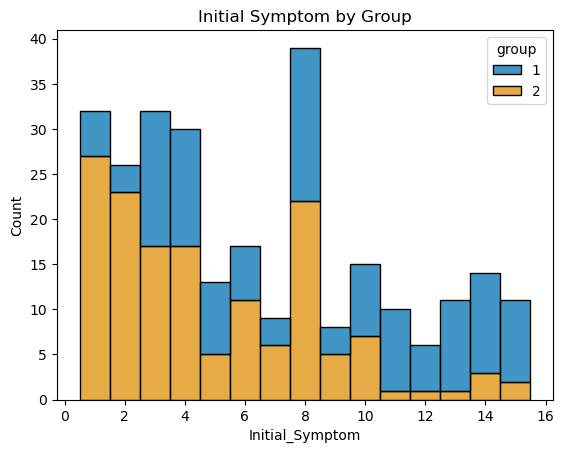

In [25]:
sns.histplot(data=ms, x="Initial_Symptom", hue="group", multiple="stack", discrete=True, palette="colorblind")
plt.title("Initial Symptom by Group")
plt.show()

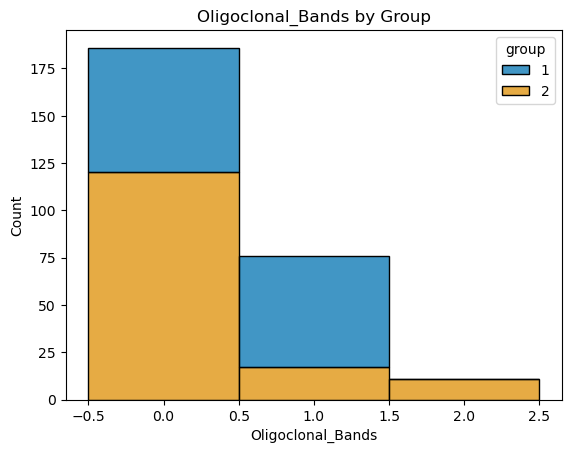

In [26]:
sns.histplot(data=ms, x="Oligoclonal_Bands", hue="group", multiple="stack", discrete=True, palette="colorblind")
plt.title("Oligoclonal_Bands by Group")
plt.show()

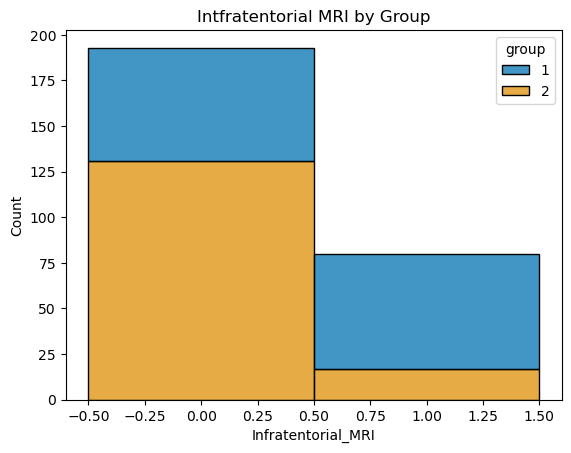

In [27]:
sns.histplot(data=ms, x="Infratentorial_MRI", hue="group", multiple="stack", discrete=True, palette="colorblind")
plt.title("Intfratentorial MRI by Group")
plt.show()

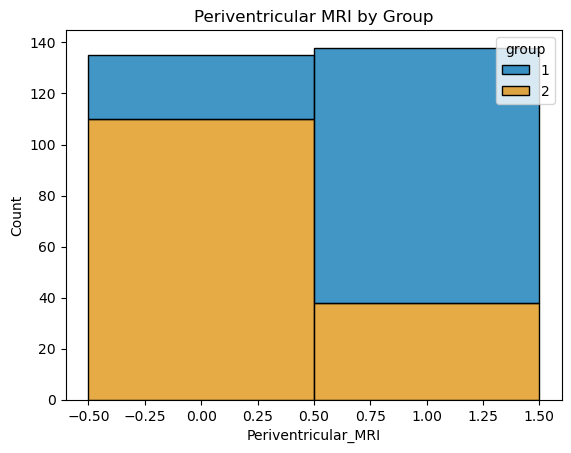

In [28]:
sns.histplot(data=ms, x="Periventricular_MRI", hue="group", multiple="stack", discrete=True, palette="colorblind")
plt.title("Periventricular MRI by Group")
plt.show()

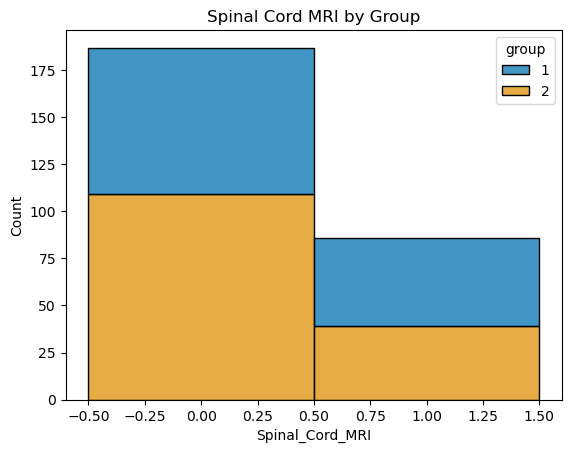

In [29]:
sns.histplot(data=ms, x="Spinal_Cord_MRI", hue="group", multiple="stack", discrete=True, palette="colorblind")
plt.title("Spinal Cord MRI by Group")
plt.show()

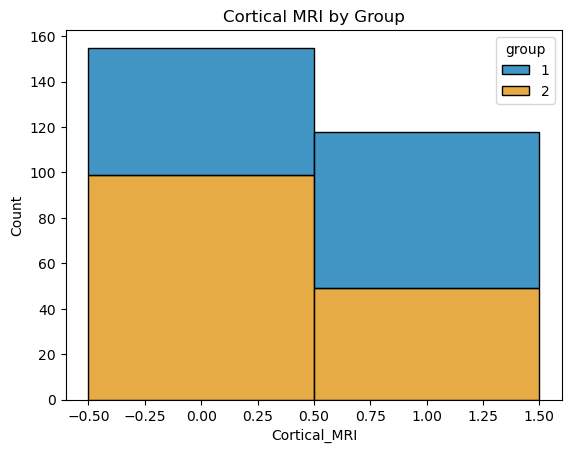

In [30]:
sns.histplot(data=ms, x="Cortical_MRI", hue="group", multiple="stack", discrete=True, palette="colorblind")
plt.title("Cortical MRI by Group")
plt.show()

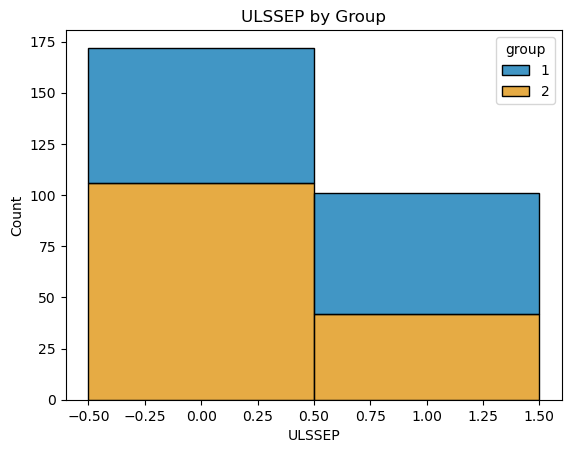

In [31]:
sns.histplot(data=ms, x="ULSSEP", hue="group", multiple="stack", discrete=True, palette="colorblind")
plt.title("ULSSEP by Group")
plt.show()

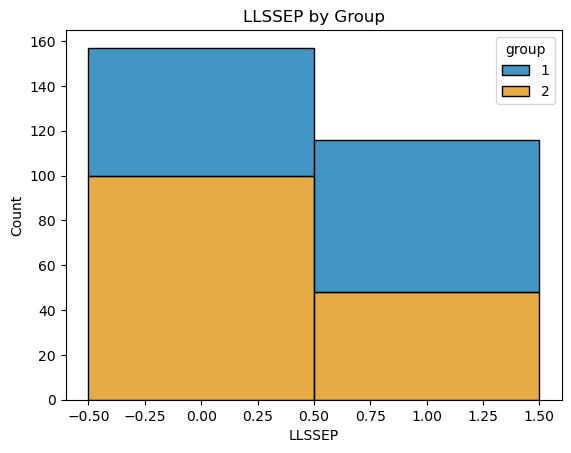

In [32]:
sns.histplot(data=ms, x="LLSSEP", hue="group", multiple="stack", discrete=True, palette="colorblind")
plt.title("LLSSEP by Group")
plt.show()

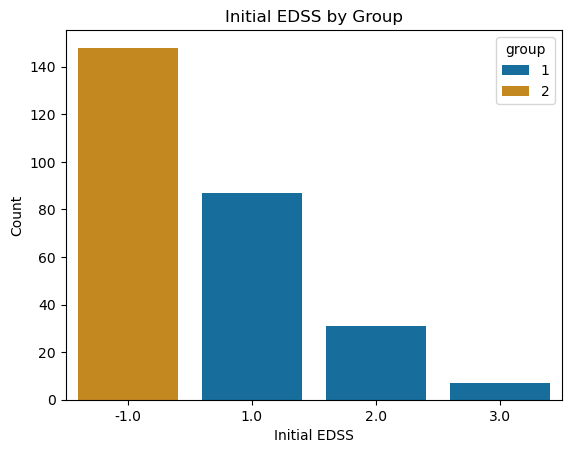

In [33]:
sns.countplot(x='Initial_EDSS', hue='group',palette='colorblind', data=ms)
plt.title("Initial EDSS by Group")
plt.xlabel("Initial EDSS")
plt.ylabel("Count")
plt.show()

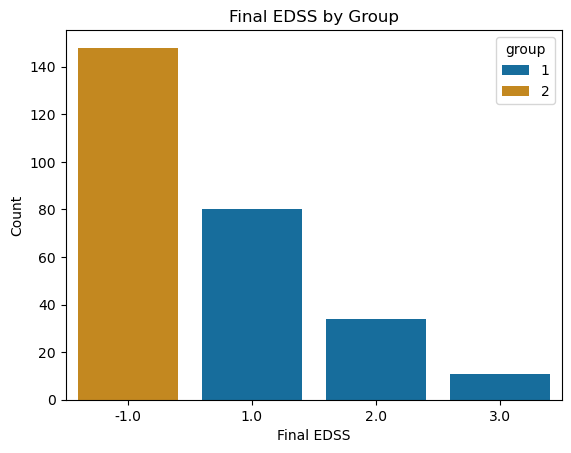

In [34]:
sns.countplot(x='Final_EDSS', hue='group',palette='colorblind', data=ms)
plt.title("Final EDSS by Group")
plt.xlabel("Final EDSS")
plt.ylabel("Count")
plt.show()

In [35]:
print(ms['group'].value_counts())

group
2    148
1    125
Name: count, dtype: int64


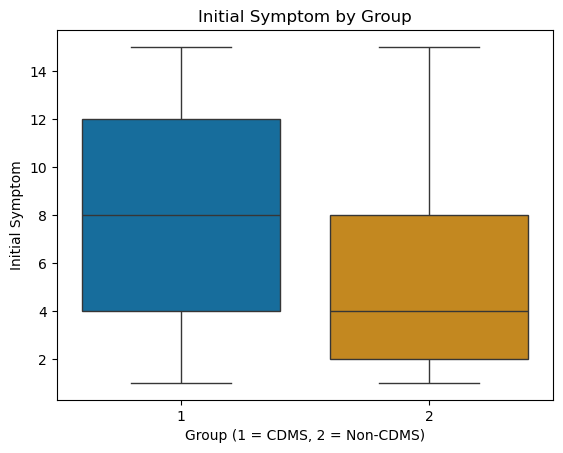

In [36]:
# Box Plot for Initial Symptoms 
sns.boxplot(x='group', y='Initial_Symptom', data=ms, palette='colorblind', hue='group')
plt.title("Initial Symptom by Group")
plt.xlabel("Group (1 = CDMS, 2 = Non-CDMS)")
plt.ylabel("Initial Symptom")
plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.show()

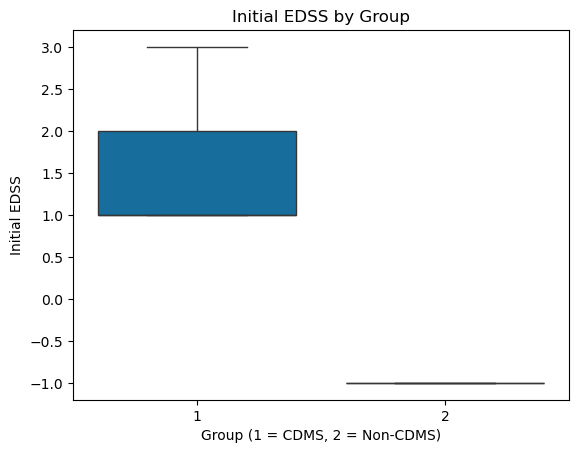

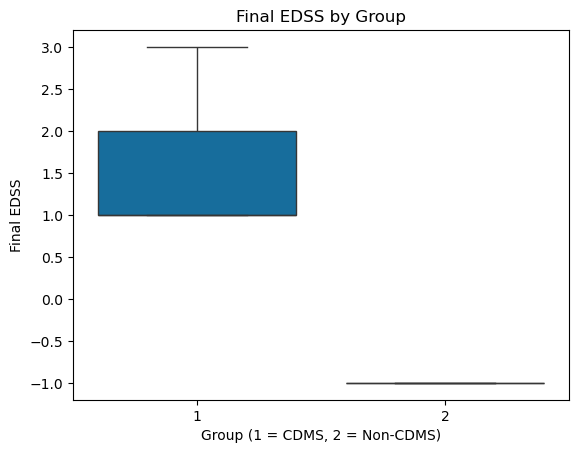

In [37]:
# Box Plot for Initial and Final EDSS  
sns.boxplot(x='group', y='Initial_EDSS', data=ms, palette='colorblind', hue='group')
plt.title("Initial EDSS by Group")
plt.xlabel("Group (1 = CDMS, 2 = Non-CDMS)")
plt.ylabel("Initial EDSS")
plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.show()

sns.boxplot(x='group', y='Final_EDSS', data=ms, palette='colorblind', hue='group')
plt.title("Final EDSS by Group")
plt.xlabel("Group (1 = CDMS, 2 = Non-CDMS)")
plt.ylabel("Final EDSS")
plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.show()

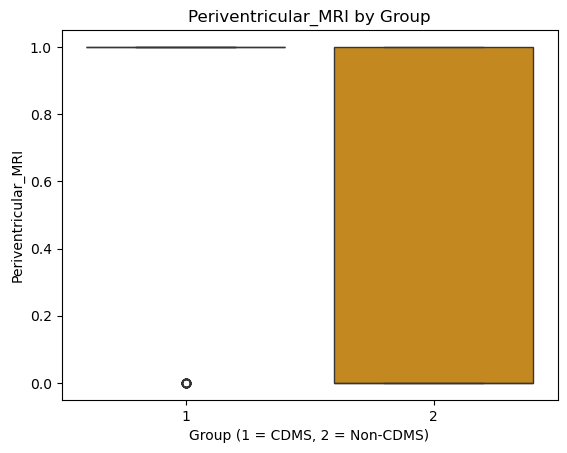

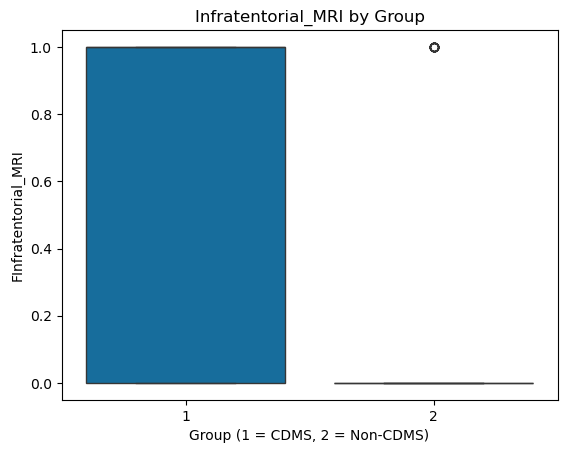

In [38]:
# Box Plot for MRIS
sns.boxplot(x='group', y='Periventricular_MRI', data=ms, palette='colorblind', hue='group')
plt.title("Periventricular_MRI by Group")
plt.xlabel("Group (1 = CDMS, 2 = Non-CDMS)")
plt.ylabel("Periventricular_MRI")
plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.show()

sns.boxplot(x='group', y='Infratentorial_MRI', data=ms, palette='colorblind', hue='group')
plt.title("Infratentorial_MRI by Group")
plt.xlabel("Group (1 = CDMS, 2 = Non-CDMS)")
plt.ylabel("FInfratentorial_MRI")
plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.show()

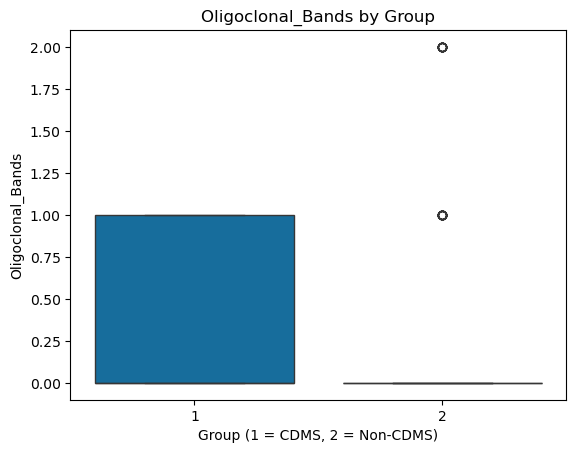

In [39]:
# Box Plot for Initial Symptoms 
sns.boxplot(x='group', y='Oligoclonal_Bands', data=ms, palette='colorblind', hue='group')
plt.title("Oligoclonal_Bands by Group")
plt.xlabel("Group (1 = CDMS, 2 = Non-CDMS)")
plt.ylabel("Oligoclonal_Bands")
plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.show()

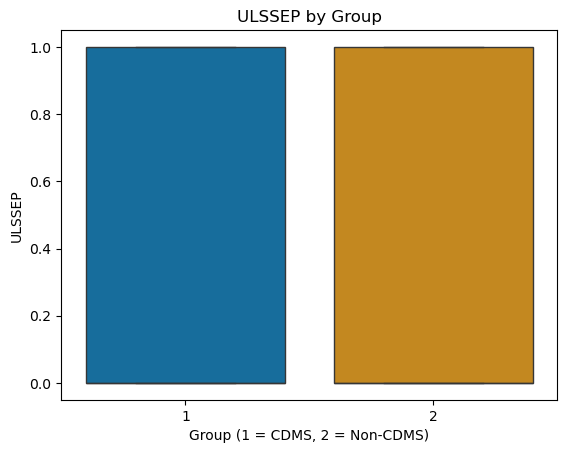

In [40]:
# Box Plot for Initial Symptoms 
sns.boxplot(x='group', y='ULSSEP', data=ms, palette='colorblind', hue='group')
plt.title("ULSSEP by Group")
plt.xlabel("Group (1 = CDMS, 2 = Non-CDMS)")
plt.ylabel("ULSSEP")
plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.show()

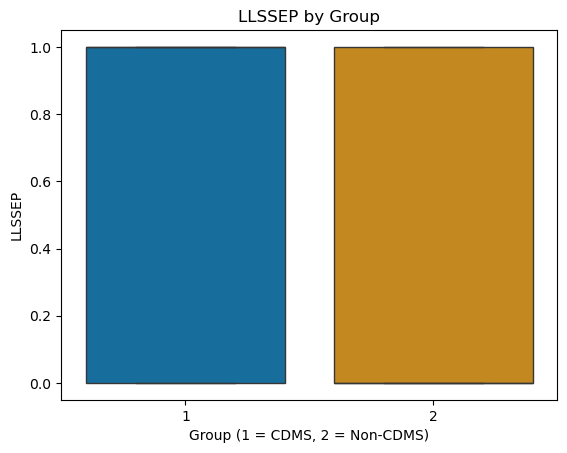

In [41]:
# Box Plot for Initial Symptoms 
sns.boxplot(x='group', y='LLSSEP', data=ms, palette='colorblind', hue='group')
plt.title("LLSSEP by Group")
plt.xlabel("Group (1 = CDMS, 2 = Non-CDMS)")
plt.ylabel("LLSSEP")
plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.show()

In [42]:
### OUTLIER DETECTION ###

In [43]:

# Calculate Z-scores for outlier analysis and feature inspection
z_score_columns = ['Initial_Symptom', 'Initial_EDSS', 'Final_EDSS', 
                   'Periventricular_MRI', 'Infratentorial_MRI', 'Cortical_MRI', 'Spinal_Cord_MRI', 'Oligoclonal_Bands']

# Adding Z-Score columns for analysis only
for col in z_score_columns:
    mean = ms[col].mean()
    std = ms[col].std()
    ms[f'{col}_z'] = (ms[col] - mean) / std

# Display the first few rows of Z-score data
print("Z-Scored Data (First 5 Rows):")
print(ms[[f'{col}_z' for col in z_score_columns]].head())

Z-Scored Data (First 5 Rows):
   Initial_Symptom_z  Initial_EDSS_z  Final_EDSS_z  Periventricular_MRI_z  \
0          -1.043345        0.739696      0.676739              -1.009197   
1           0.849234        1.544227      1.446531              -1.009197   
2          -0.806772        0.739696      0.676739              -1.009197   
3           0.139517        0.739696      0.676739               0.987258   
4          -0.097055        0.739696      0.676739               0.987258   

   Infratentorial_MRI_z  Cortical_MRI_z  Spinal_Cord_MRI_z  \
0             -0.642643        1.144005           1.471888   
1             -0.642643       -0.870920           1.471888   
2             -0.642643        1.144005          -0.676911   
3             -0.642643        1.144005          -0.676911   
4             -0.642643       -0.870920          -0.676911   

   Oligoclonal_Bands_z  
0            -0.642832  
1             1.147914  
2             1.147914  
3             1.147914  
4        

In [44]:
# Features to check for outliers
features_to_check = ['Initial_Symptom', 'Initial_EDSS', 'Final_EDSS', 
                   'Periventricular_MRI', 'Infratentorial_MRI', 'Cortical_MRI', 'Spinal_Cord_MRI', 'Oligoclonal_Bands']

# Set to store outlier indices
outlier_indices = set()

# Loop through each feature and detect outliers
for feature in features_to_check:
    # Calculate Q1, Q3, and IQR
    Q1 = ms[feature].quantile(0.25)
    Q3 = ms[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for the current feature
    outliers = ms[(ms[feature] < lower_bound) | (ms[feature] > upper_bound)].index
    
    # Add outlier indices to the set
    outlier_indices.update(outliers)

# Remove all outliers
ms_cleaned = ms.drop(index=outlier_indices)

# Print summary
print(f"Original data shape: {ms.shape}")
print(f"Cleaned data shape: {ms_cleaned.shape}")
print(f"Number of outliers removed: {len(outlier_indices)}")


Original data shape: (273, 28)
Cleaned data shape: (273, 28)
Number of outliers removed: 0


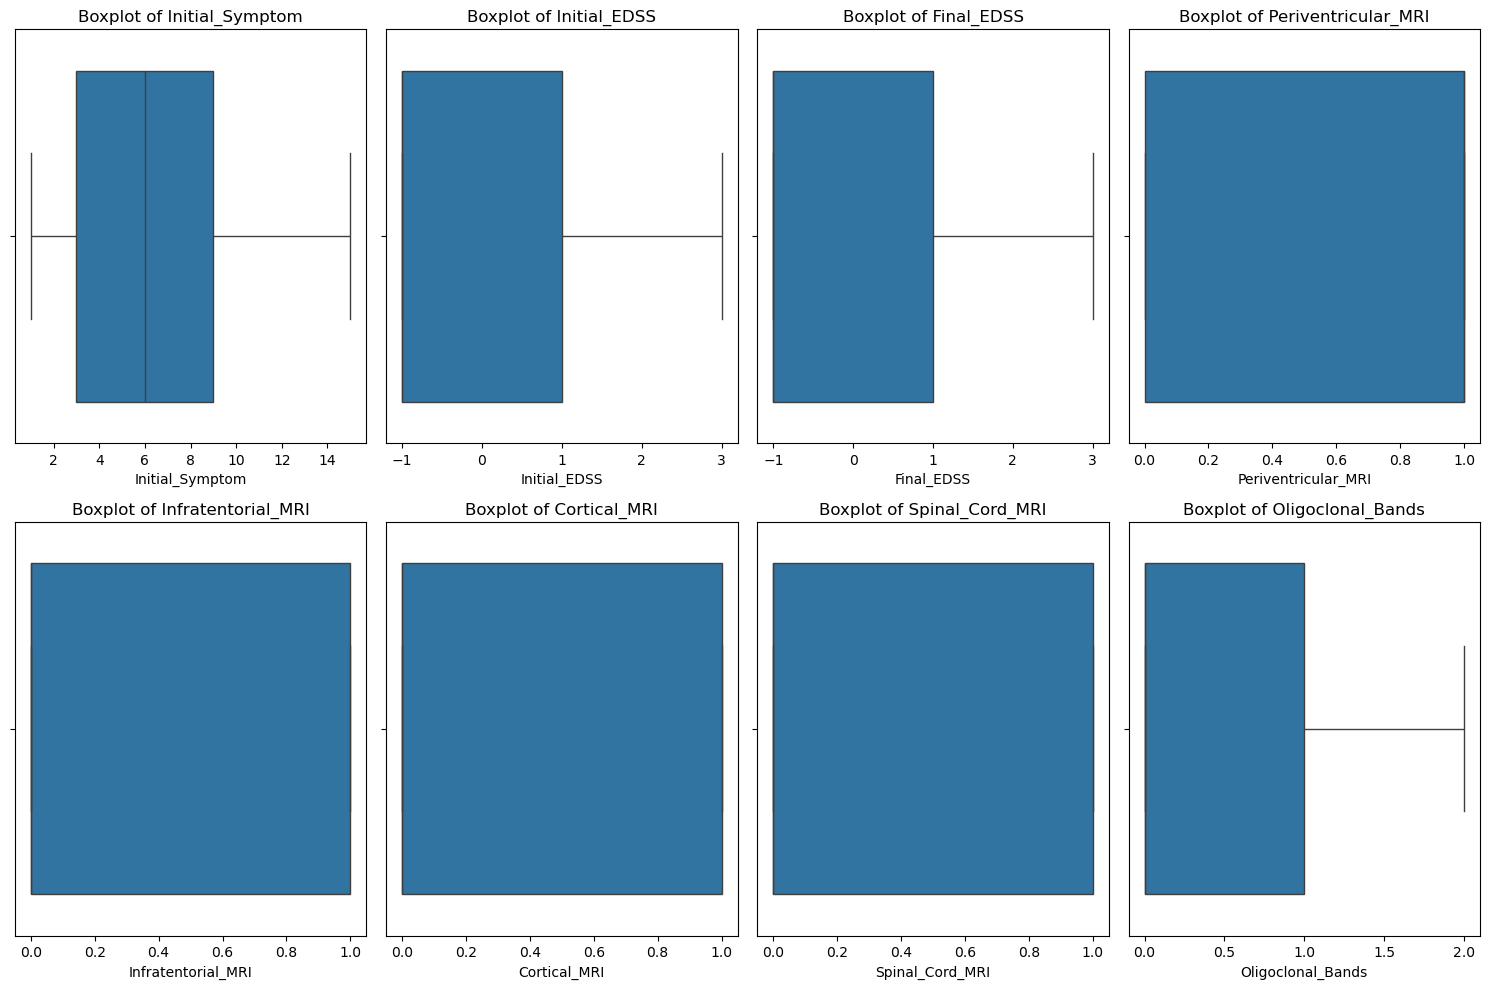

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_check = ['Initial_Symptom', 'Initial_EDSS', 'Final_EDSS', 
                   'Periventricular_MRI', 'Infratentorial_MRI', 'Cortical_MRI', 'Spinal_Cord_MRI', 'Oligoclonal_Bands']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=ms[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


In [46]:
#################################################
# Clinically Significant Feature                #
# Selection for Classification                  #
#################################################

In [47]:
# Define features and target
features = ['Initial_Symptom', 'Initial_EDSS', 
                     'Periventricular_MRI', 'Spinal_Cord_MRI', 
                     'Oligoclonal_Bands']
X = ms_cleaned[features]
y = ms_cleaned['group']
# display the first 5 rows of the feature data to ensure it has loaded correctly
X.head()

,Initial_Symptom,Initial_EDSS,Periventricular_MRI,Spinal_Cord_MRI,Oligoclonal_Bands
0,2.0,1.0,0,1,0
1,10.0,2.0,0,1,1
2,3.0,1.0,0,0,1
3,7.0,1.0,1,0,1
4,6.0,1.0,1,0,0


In [48]:
#################################################
#  Split the Data                               #
#################################################

In [49]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [50]:
#################################################
#  Scaling Data                                 #
#################################################

In [51]:
# Manual Min-Max Scaling
min_on_training = X_train.min(axis=0)
range_on_training = X_train.max(axis=0) - min_on_training
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

# Check scaled values
print("Minimum for each feature after scaling:\n", X_train_scaled.min(axis=0))
print("Maximum for each feature after scaling:\n", X_train_scaled.max(axis=0))

Minimum for each feature after scaling:
 Initial_Symptom        0.0
Initial_EDSS           0.0
Periventricular_MRI    0.0
Spinal_Cord_MRI        0.0
Oligoclonal_Bands      0.0
dtype: float64
Maximum for each feature after scaling:
 Initial_Symptom        1.0
Initial_EDSS           1.0
Periventricular_MRI    1.0
Spinal_Cord_MRI        1.0
Oligoclonal_Bands      1.0
dtype: float64


In [52]:
#################################################
#  SVM Model Training                           #
#################################################

In [53]:
# Training SVM with Min-Max scaling and default C and gamma values (C=1.0, gamma='scale').
svc_base_minmax = SVC(probability=True, random_state=0)
svc_base_minmax.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=0)

In [54]:
train_accuracy_base = svc_base_minmax.score(X_train_scaled, y_train)
test_accuracy_base = svc_base_minmax.score(X_test_scaled, y_test)
print("Accuracy on training set, Min-Max Scaling no tuning, : {:.2f}".format(train_accuracy_base))
print("Accuracy on test set, Min-Max Scaling no tuning, : {:.2f}".format(test_accuracy_base))

Accuracy on training set, Min-Max Scaling no tuning, : 1.00
Accuracy on test set, Min-Max Scaling no tuning, : 1.00


In [55]:
# Get predicted probabilities for the test set using Min-Max scaling with default C and Gamma
y_pred_proba_svc_base_minmax = svc_base_minmax.predict_proba(X_test_scaled)  
print("Predicted probabilities for the test set (SVM - Minmax):\n", y_pred_proba_svc_base_minmax[:5]) 

Predicted probabilities for the test set (SVM - Minmax):
 [[0.99794759 0.00205241]
 [0.00623312 0.99376688]
 [0.98759707 0.01240293]
 [0.97714528 0.02285472]
 [0.01194354 0.98805646]]


[[38  0]
 [ 0 44]]


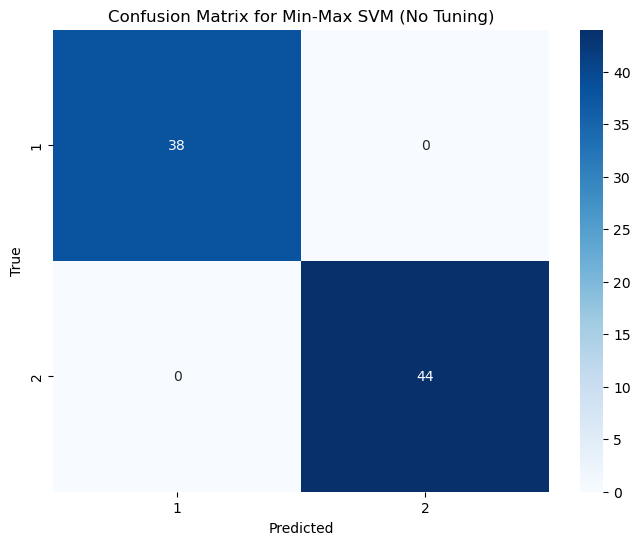

In [56]:
# Get predicted class labels for the test set using tuned SVM
y_pred_proba_svc_base_minmax = svc_base_minmax.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_proba_svc_base_minmax))

# Generate the confusion matrix with tuned class labels
conf_matrix_base_minmax = confusion_matrix(y_test, y_pred_proba_svc_base_minmax)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_base_minmax, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Min-Max SVM (No Tuning)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
print("F1-Score:")
print(classification_report(y_test, svc_base_minmax.predict(X_test_scaled)))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, svc_base_minmax.decision_function(X_test_scaled)))


F1-Score:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        44

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

ROC-AUC Score:
1.0


In [58]:
#################################################
#   SVM - HYPERTUNING                           #
#################################################

In [59]:
# starting by setting C=10 and gamma=1.
svc_minmax2 = SVC(C=100, gamma=1, probability=True, random_state=0) 
svc_minmax2.fit(X_train_scaled, y_train)

SVC(C=100, gamma=1, probability=True, random_state=0)

In [60]:
# Calculating the accuracy for svc_minmax2 on both training and test sets.
train_accuracy_default = svc_minmax2.score(X_train_scaled, y_train)
test_accuracy_default = svc_minmax2.score(X_test_scaled, y_test)
print("Accuracy on training set, Min-Max Scaling, C=100, Gamma=1: {:.2f}".format(train_accuracy_default))
print("Accuracy on test set, Min-Max Scaling, C=100, Gamma=1: {:.2f}".format(test_accuracy_default))

Accuracy on training set, Min-Max Scaling, C=100, Gamma=1: 1.00
Accuracy on test set, Min-Max Scaling, C=100, Gamma=1: 1.00


In [61]:
# predicting probabilities for the test set for svc_minmax2
y_pred_proba_svc_minmax2 = svc_minmax2.predict_proba(X_test_scaled)  
print("Predicted probabilities for the test set (SVM - Minmax - C = 10 Gamma = 1):\n", y_pred_proba_svc_minmax2[:5])  


Predicted probabilities for the test set (SVM - Minmax - C = 10 Gamma = 1):
 [[0.99872002 0.00127998]
 [0.00777601 0.99222399]
 [0.98545426 0.01454574]
 [0.97950969 0.02049031]
 [0.00832063 0.99167937]]


[[38  0]
 [ 0 44]]


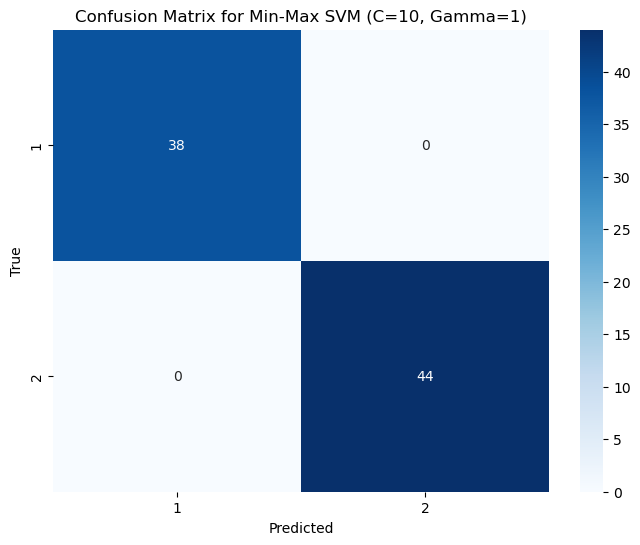

In [62]:
# predicting class labels for the test set for svc_minmax2
y_pred_svc_minmax2 = svc_minmax2.predict(X_test_scaled)  

print(confusion_matrix(y_test, y_pred_svc_minmax2))

# generating the confusion matrix for svc_minmax2
conf_matrix_minmax_2 = confusion_matrix(y_test, y_pred_svc_minmax2)

# Plot confusion matrix for svc_minmax2
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_minmax_2, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Min-Max SVM (C=10, Gamma=1)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [63]:
print("F1-Score:")
print(classification_report(y_test, svc_minmax2.predict(X_test_scaled)))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, svc_minmax2.decision_function(X_test_scaled)))


F1-Score:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        44

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

ROC-AUC Score:
1.0


In [64]:
svc_minmax3 = SVC(C=.1, gamma=.1, probability=True, random_state=0)
svc_minmax3.fit(X_train_scaled, y_train)

SVC(C=0.1, gamma=0.1, probability=True, random_state=0)

In [65]:
# Calculating the accuracy for svc_minmax3 on both training and test sets.
train_accuracy_default = svc_minmax3.score(X_train_scaled, y_train)
test_accuracy_default = svc_minmax3.score(X_test_scaled, y_test)
print("Accuracy on training set, Min-Max Scaling, C=.1, Gamma=.1: {:.2f}".format(train_accuracy_default))
print("Accuracy on test set, Min-Max Scaling, C=.1, Gamma=.1: {:.2f}".format(test_accuracy_default))

Accuracy on training set, Min-Max Scaling, C=.1, Gamma=.1: 0.89
Accuracy on test set, Min-Max Scaling, C=.1, Gamma=.1: 0.85


In [66]:
# predicting probabilities for the test set for svc_minmax3
y_pred_proba_svc_minmax3 = svc_minmax3.predict_proba(X_test_scaled)  
print("Predicted probabilities for the test set (SVM - Minmax - C=.1, Gamma=.1):\n", y_pred_proba_svc_minmax3[:5])  

Predicted probabilities for the test set (SVM - Minmax - C=.1, Gamma=.1):
 [[0.98716712 0.01283288]
 [0.70974848 0.29025152]
 [0.33006514 0.66993486]
 [0.41268558 0.58731442]
 [0.90303954 0.09696046]]


[[30  8]
 [ 4 40]]


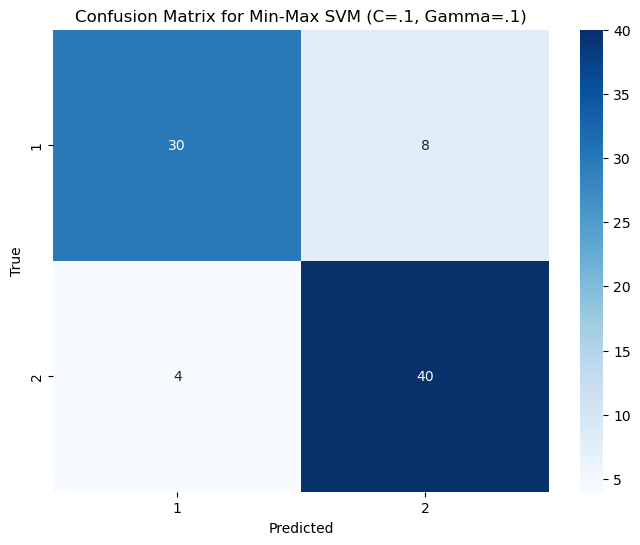

In [67]:

# predicting class labels for the test set for svc_minmax3
y_pred_svc_minmax3 = svc_minmax3.predict(X_test_scaled)  # Use predict to get class labels for confusion matrix

print(confusion_matrix(y_test, y_pred_svc_minmax3))

# generating the confusion matrix for svc_minmax3
conf_matrix_minmax3 = confusion_matrix(y_test, y_pred_svc_minmax3)

# Plot confusion matrix for svc_minmax3
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_minmax3, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Min-Max SVM (C=.1, Gamma=.1)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [68]:
print("F1-Score:")
print(classification_report(y_test, svc_minmax3.predict(X_test_scaled)))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, svc_minmax3.decision_function(X_test_scaled)))


F1-Score:
              precision    recall  f1-score   support

           1       0.88      0.79      0.83        38
           2       0.83      0.91      0.87        44

    accuracy                           0.85        82
   macro avg       0.86      0.85      0.85        82
weighted avg       0.86      0.85      0.85        82

ROC-AUC Score:
0.9395933014354068


In [69]:
svc_minmax4 = SVC(C=.15, gamma=.15, probability=True, random_state=0)
svc_minmax4.fit(X_train_scaled, y_train)

SVC(C=0.15, gamma=0.15, probability=True, random_state=0)

In [70]:
# Calculating the accuracy for svc_minmax3 on both training and test sets.
train_accuracy_default = svc_minmax4.score(X_train_scaled, y_train)
test_accuracy_default = svc_minmax4.score(X_test_scaled, y_test)
print("Accuracy on training set, Min-Max Scaling, C=.15, Gamma=.15: {:.2f}".format(train_accuracy_default))
print("Accuracy on test set, Min-Max Scaling, C=.15, Gamma=.15: {:.2f}".format(test_accuracy_default))

Accuracy on training set, Min-Max Scaling, C=.15, Gamma=.15: 0.84
Accuracy on test set, Min-Max Scaling, C=.15, Gamma=.15: 0.82


In [71]:
# predicting probabilities for the test set for svc_minmax3
y_pred_proba_svc_minmax4 = svc_minmax4.predict_proba(X_test_scaled)  
print("Predicted probabilities for the test set (SVM - Minmax - C=.15, Gamma=.15):\n", y_pred_proba_svc_minmax4[:5])  

Predicted probabilities for the test set (SVM - Minmax - C=.15, Gamma=.15):
 [[0.95172631 0.04827369]
 [0.49184862 0.50815138]
 [0.26185417 0.73814583]
 [0.31354217 0.68645783]
 [0.641548   0.358452  ]]


[[31  7]
 [ 8 36]]


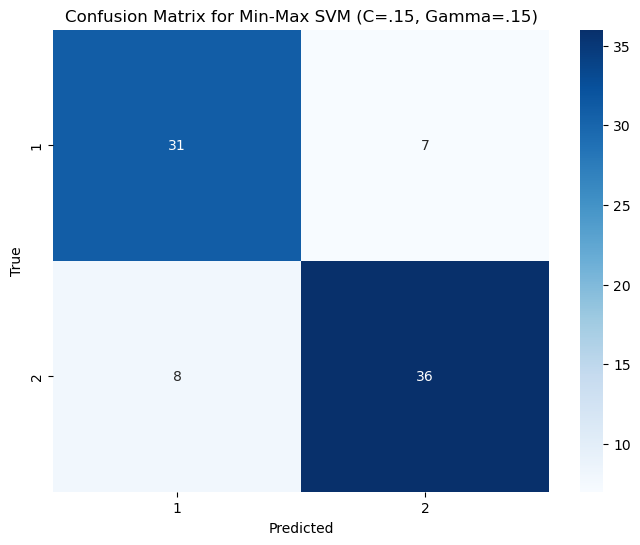

In [72]:

# predicting class labels for the test set for svc_minmax4
y_pred_svc_minmax4 = svc_minmax4.predict(X_test_scaled)  # Use predict to get class labels for confusion matrix

print(confusion_matrix(y_test, y_pred_svc_minmax4))

# generating the confusion matrix for svc_minmax4
conf_matrix_minmax4 = confusion_matrix(y_test, y_pred_svc_minmax4)

# Plot confusion matrix for svc_minmax4
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_minmax4, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Min-Max SVM (C=.15, Gamma=.15)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [73]:
print("F1-Score:")
print(classification_report(y_test, svc_minmax4.predict(X_test_scaled)))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, svc_minmax4.decision_function(X_test_scaled)))


F1-Score:
              precision    recall  f1-score   support

           1       0.79      0.82      0.81        38
           2       0.84      0.82      0.83        44

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82

ROC-AUC Score:
0.9401913875598086


In [74]:
svc_minmax5 = SVC(C=.2, gamma=.15, probability=True, random_state=0)
svc_minmax5.fit(X_train_scaled, y_train)

SVC(C=0.2, gamma=0.15, probability=True, random_state=0)

In [75]:
# Calculating the accuracy for svc_minmax3 on both training and test sets.
train_accuracy_default = svc_minmax5.score(X_train_scaled, y_train)
test_accuracy_default = svc_minmax5.score(X_test_scaled, y_test)
print("Accuracy on training set, Min-Max Scaling, C=.2, Gamma=.15: {:.2f}".format(train_accuracy_default))
print("Accuracy on test set, Min-Max Scaling, C=.2, Gamma=.15: {:.2f}".format(test_accuracy_default))

Accuracy on training set, Min-Max Scaling, C=.2, Gamma=.15: 0.84
Accuracy on test set, Min-Max Scaling, C=.2, Gamma=.15: 0.82


In [76]:
# predicting probabilities for the test set for svc_minmax5
y_pred_proba_svc_minmax5 = svc_minmax5.predict_proba(X_test_scaled)  
print("Predicted probabilities for the test set (SVM - Minmax - C=.15, Gamma=.15):\n", y_pred_proba_svc_minmax5[:5])  

Predicted probabilities for the test set (SVM - Minmax - C=.15, Gamma=.15):
 [[0.97484995 0.02515005]
 [0.48947792 0.51052208]
 [0.3213564  0.6786436 ]
 [0.37037606 0.62962394]
 [0.6426347  0.3573653 ]]


[[31  7]
 [ 8 36]]


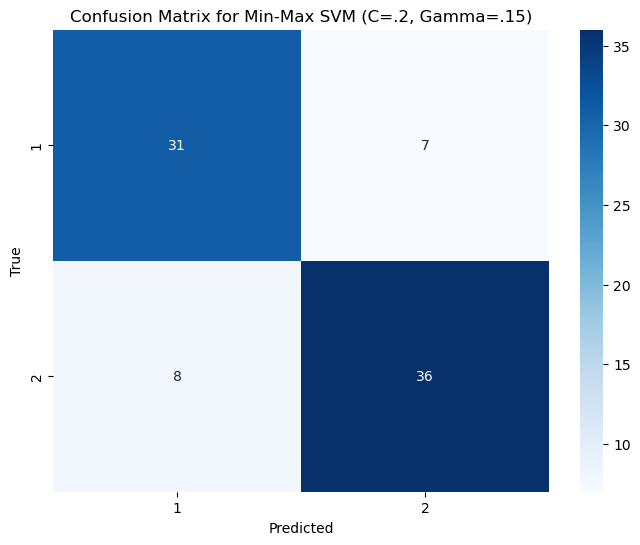

In [77]:

# predicting class labels for the test set for svc_minmax5
y_pred_svc_minmax5 = svc_minmax5.predict(X_test_scaled)  # Use predict to get class labels for confusion matrix

print(confusion_matrix(y_test, y_pred_svc_minmax5))

# generating the confusion matrix for svc_minmax5
conf_matrix_minmax5 = confusion_matrix(y_test, y_pred_svc_minmax5)

# Plot confusion matrix for svc_minmax5
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_minmax5, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Min-Max SVM (C=.2, Gamma=.15)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [78]:
print("F1-Score:")
print(classification_report(y_test, svc_minmax5.predict(X_test_scaled)))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, svc_minmax5.decision_function(X_test_scaled)))


F1-Score:
              precision    recall  f1-score   support

           1       0.79      0.82      0.81        38
           2       0.84      0.82      0.83        44

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82

ROC-AUC Score:
0.9425837320574163


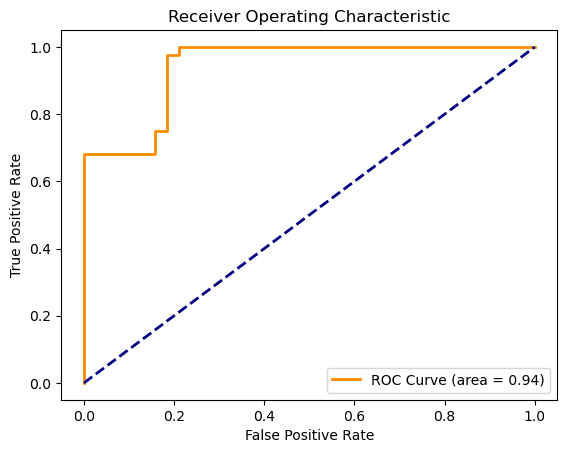

In [79]:
# Specify the positive label (e.g., 2 as the positive class)
fpr, tpr, _ = roc_curve(y_test, svc_minmax5.decision_function(X_test_scaled), pos_label=2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [80]:
#################################################
#  K-NN Model Training                           #
#################################################

Accuracy (n_neighbors=1):
Training Accuracy: 1.00
Test Accuracy: 1.00

Classification Report (n_neighbors=1):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        44

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82


Confusion Matrix (n_neighbors=1):
[[38  0]
 [ 0 44]]
ROC-AUC Score:
1.0


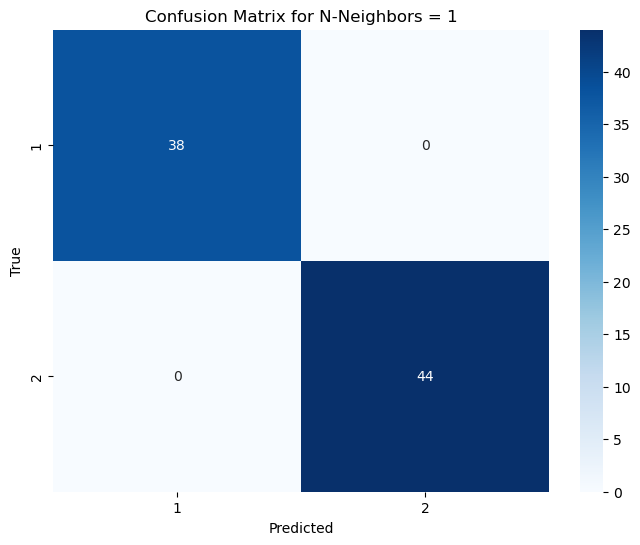

In [81]:
# Step 1: Try k-NN with n_neighbors=1
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train_scaled, y_train)

# Evaluate on training and test sets
train_accuracy_1 = knn_1.score(X_train_scaled, y_train)
test_accuracy_1 = knn_1.score(X_test_scaled, y_test)
print("Accuracy (n_neighbors=1):")
print(f"Training Accuracy: {train_accuracy_1:.2f}")
print(f"Test Accuracy: {test_accuracy_1:.2f}")

# Classification report and confusion matrix for n_neighbors=1
y_pred_knn_1 = knn_1.predict(X_test_scaled)
print("\nClassification Report (n_neighbors=1):")
print(classification_report(y_test, y_pred_knn_1))
print("\nConfusion Matrix (n_neighbors=1):")
print(confusion_matrix(y_test, y_pred_knn_1))

# ROC-AUC Score
print("ROC-AUC Score:")
print(roc_auc_score(y_test, knn_1.predict_proba(X_test_scaled)[:, 1]))


# generating the confusion matrix 
conf_matrix_knn_1 = confusion_matrix(y_test, y_pred_knn_1)
# Plot confusion matrix 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_knn_1, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for N-Neighbors = 1')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy (n_neighbors=5):
Training Accuracy: 0.99
Test Accuracy: 0.98

Classification Report (n_neighbors=5):
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        38
           2       0.98      0.98      0.98        44

    accuracy                           0.98        82
   macro avg       0.98      0.98      0.98        82
weighted avg       0.98      0.98      0.98        82


Confusion Matrix (n_neighbors=5):
[[37  1]
 [ 1 43]]
ROC-AUC Score:
0.9982057416267942


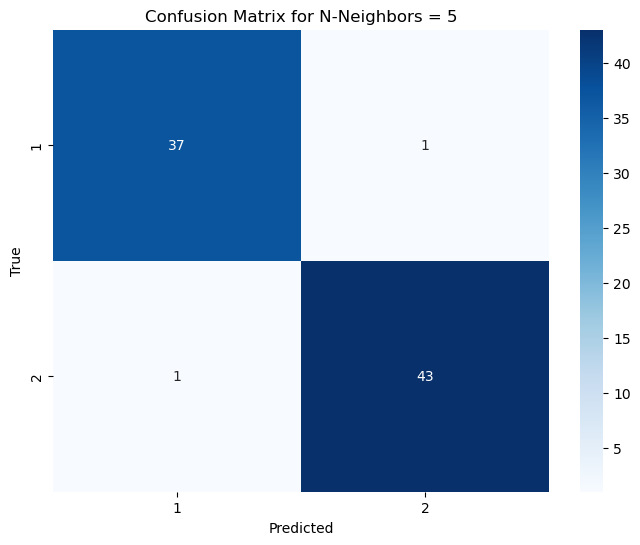

In [82]:
#  Try k-NN with n_neighbors=5
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train_scaled, y_train)

# Evaluate on training and test sets
train_accuracy_2 = knn_2.score(X_train_scaled, y_train)
test_accuracy_2 = knn_2.score(X_test_scaled, y_test)
print("Accuracy (n_neighbors=5):")
print(f"Training Accuracy: {train_accuracy_2:.2f}")
print(f"Test Accuracy: {test_accuracy_2:.2f}")

# Classification report and confusion matrix for n_neighbors=1
y_pred_knn_2 = knn_2.predict(X_test_scaled)
print("\nClassification Report (n_neighbors=5):")
print(classification_report(y_test, y_pred_knn_2))
print("\nConfusion Matrix (n_neighbors=5):")
print(confusion_matrix(y_test, y_pred_knn_2))

# ROC-AUC Score
print("ROC-AUC Score:")
print(roc_auc_score(y_test, knn_2.predict_proba(X_test_scaled)[:, 1]))

# generating the confusion matrix 
conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)
# Plot confusion matrix 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_knn_2, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for N-Neighbors = 5')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy (n_neighbors=3):
Training Accuracy: 0.93
Test Accuracy: 0.91

Classification Report (n_neighbors=10):
              precision    recall  f1-score   support

           1       0.88      0.95      0.91        38
           2       0.95      0.89      0.92        44

    accuracy                           0.91        82
   macro avg       0.91      0.92      0.91        82
weighted avg       0.92      0.91      0.91        82


Confusion Matrix (n_neighbors=10):
[[36  2]
 [ 5 39]]
ROC-AUC Score:
0.9901315789473685


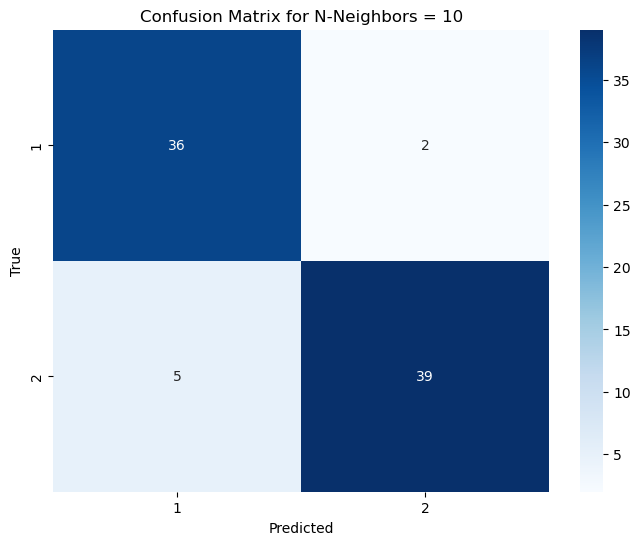

In [83]:
# Try k-NN with n_neighbors=10
knn_3 = KNeighborsClassifier(n_neighbors=10)
knn_3.fit(X_train_scaled, y_train)

# Evaluate on training and test sets
train_accuracy_3 = knn_3.score(X_train_scaled, y_train)
test_accuracy_3 = knn_3.score(X_test_scaled, y_test)
print("\nAccuracy (n_neighbors=3):")
print(f"Training Accuracy: {train_accuracy_3:.2f}")
print(f"Test Accuracy: {test_accuracy_3:.2f}")

# Classification report and confusion matrix for n_neighbors=3
y_pred_knn_3 = knn_3.predict(X_test_scaled)
print("\nClassification Report (n_neighbors=10):")
print(classification_report(y_test, y_pred_knn_3))
print("\nConfusion Matrix (n_neighbors=10):")
print(confusion_matrix(y_test, y_pred_knn_3))

# ROC-AUC Score
print("ROC-AUC Score:")
print(roc_auc_score(y_test, knn_3.predict_proba(X_test_scaled)[:, 1]))

# generating the confusion matrix 
conf_matrix_knn_3 = confusion_matrix(y_test, y_pred_knn_3)
# Plot confusion matrix 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_knn_3, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for N-Neighbors = 10')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy (n_neighbors=5):
Training Accuracy: 0.91
Test Accuracy: 0.89

Classification Report (n_neighbors=15):
              precision    recall  f1-score   support

           1       0.87      0.89      0.88        38
           2       0.91      0.89      0.90        44

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82


Confusion Matrix (n_neighbors=15):
[[34  4]
 [ 5 39]]
ROC-AUC Score:
0.9739832535885167


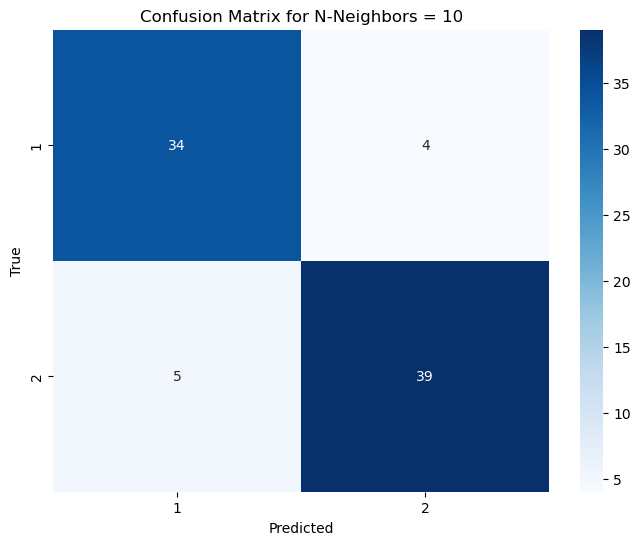

In [84]:
# Try k-NN with n_neighbors= 15
knn_4 = KNeighborsClassifier(n_neighbors=15)
knn_4.fit(X_train_scaled, y_train)

# Evaluate on training and test sets
train_accuracy_4 = knn_4.score(X_train_scaled, y_train)
test_accuracy_4 = knn_4.score(X_test_scaled, y_test)
print("\nAccuracy (n_neighbors=5):")
print(f"Training Accuracy: {train_accuracy_4:.2f}")
print(f"Test Accuracy: {test_accuracy_4:.2f}")

# Classification report and confusion matrix for n_neighbors=5
y_pred_knn_4 = knn_4.predict(X_test_scaled)
print("\nClassification Report (n_neighbors=15):")
print(classification_report(y_test, y_pred_knn_4))
print("\nConfusion Matrix (n_neighbors=15):")
print(confusion_matrix(y_test, y_pred_knn_4))

# ROC-AUC Score
print("ROC-AUC Score:")
print(roc_auc_score(y_test, knn_4.predict_proba(X_test_scaled)[:, 1]))

# generating the confusion matrix 
conf_matrix_knn_4 = confusion_matrix(y_test, y_pred_knn_4)
# Plot confusion matrix 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_knn_4, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for N-Neighbors = 10')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy (n_neighbors=42):
Training Accuracy: 0.81
Test Accuracy: 0.77

Classification Report (n_neighbors=42):
              precision    recall  f1-score   support

           1       0.71      0.84      0.77        38
           2       0.84      0.70      0.77        44

    accuracy                           0.77        82
   macro avg       0.77      0.77      0.77        82
weighted avg       0.78      0.77      0.77        82

[[32  6]
 [13 31]]
ROC-AUC Score:
0.9225478468899522


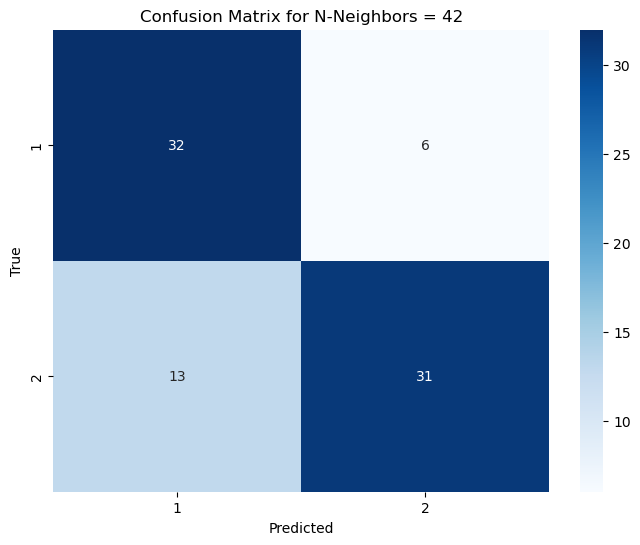

In [85]:
# Try k-NN with n_neighbors=42
knn_6 = KNeighborsClassifier(n_neighbors=42)
knn_6.fit(X_train_scaled, y_train)

# Evaluate on training and test sets
train_accuracy_6 = knn_6.score(X_train_scaled, y_train)
test_accuracy_6 = knn_6.score(X_test_scaled, y_test)
print("\nAccuracy (n_neighbors=42):")
print(f"Training Accuracy: {train_accuracy_6:.2f}")
print(f"Test Accuracy: {test_accuracy_6:.2f}")

# Classification report and confusion matrix for n_neighbors=42
y_pred_knn_6 = knn_6.predict(X_test_scaled)
print("\nClassification Report (n_neighbors=42):")
print(classification_report(y_test, y_pred_knn_6))
print(confusion_matrix(y_test, y_pred_knn_6))

# ROC-AUC Score
print("ROC-AUC Score:")
print(roc_auc_score(y_test, knn_6.predict_proba(X_test_scaled)[:, 1]))

# generating the confusion matrix 
conf_matrix_knn_6 = confusion_matrix(y_test, y_pred_knn_6)
# Plot confusion matrix 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_knn_6, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for N-Neighbors = 42')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [86]:
#### Best model seems to be KNN =5
cv_scores = cross_val_score(knn_2, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.92307692 0.92105263 0.97368421 1.         0.92105263]
Mean CV Accuracy: 0.9477732793522268


ROC-AUC Score: 0.9754784688995216


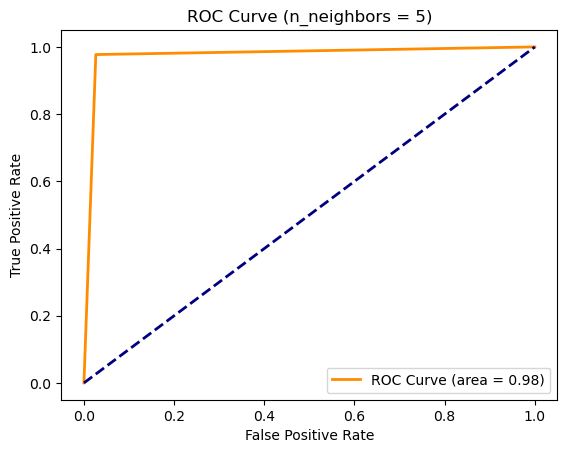

In [87]:
# Calculate the ROC-AUC score for KNN = 5
roc_auc = roc_auc_score(y_test, y_pred_knn_2)
print("ROC-AUC Score:", roc_auc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_2, pos_label=2)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (n_neighbors = 5)')
plt.legend(loc="lower right")
plt.show()